<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Problem-1" data-toc-modified-id="Problem-1-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Problem 1</a></span><ul class="toc-item"><li><span><a href="#Import" data-toc-modified-id="Import-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Import</a></span></li><li><span><a href="#Optimization" data-toc-modified-id="Optimization-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Optimization</a></span><ul class="toc-item"><li><span><a href="#Simple-SGD-optimization" data-toc-modified-id="Simple-SGD-optimization-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Simple SGD optimization</a></span></li><li><span><a href="#SGD-with-momentum" data-toc-modified-id="SGD-with-momentum-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>SGD with momentum</a></span></li><li><span><a href="#Target-functions" data-toc-modified-id="Target-functions-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>Target functions</a></span></li><li><span><a href="#Plot-cost" data-toc-modified-id="Plot-cost-1.2.4"><span class="toc-item-num">1.2.4&nbsp;&nbsp;</span>Plot cost</a></span></li><li><span><a href="#Parameters" data-toc-modified-id="Parameters-1.2.5"><span class="toc-item-num">1.2.5&nbsp;&nbsp;</span>Parameters</a></span></li><li><span><a href="#Rosenbrock-function" data-toc-modified-id="Rosenbrock-function-1.2.6"><span class="toc-item-num">1.2.6&nbsp;&nbsp;</span>Rosenbrock function</a></span></li><li><span><a href="#Powel-Function" data-toc-modified-id="Powel-Function-1.2.7"><span class="toc-item-num">1.2.7&nbsp;&nbsp;</span>Powel Function</a></span></li><li><span><a href="#Question" data-toc-modified-id="Question-1.2.8"><span class="toc-item-num">1.2.8&nbsp;&nbsp;</span>Question</a></span></li></ul></li><li><span><a href="#Regularization" data-toc-modified-id="Regularization-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Regularization</a></span><ul class="toc-item"><li><span><a href="#Parameters" data-toc-modified-id="Parameters-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Parameters</a></span></li><li><span><a href="#Loading-dataset" data-toc-modified-id="Loading-dataset-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>Loading dataset</a></span></li><li><span><a href="#Objective-function" data-toc-modified-id="Objective-function-1.3.3"><span class="toc-item-num">1.3.3&nbsp;&nbsp;</span>Objective function</a></span></li><li><span><a href="#Regularization-factor-=-0" data-toc-modified-id="Regularization-factor-=-0-1.3.4"><span class="toc-item-num">1.3.4&nbsp;&nbsp;</span>Regularization factor = 0</a></span></li><li><span><a href="#Regularization-factor-=-0.001" data-toc-modified-id="Regularization-factor-=-0.001-1.3.5"><span class="toc-item-num">1.3.5&nbsp;&nbsp;</span>Regularization factor = 0.001</a></span></li><li><span><a href="#Regularization-factor-=-0.01" data-toc-modified-id="Regularization-factor-=-0.01-1.3.6"><span class="toc-item-num">1.3.6&nbsp;&nbsp;</span>Regularization factor = 0.01</a></span></li><li><span><a href="#Question" data-toc-modified-id="Question-1.3.7"><span class="toc-item-num">1.3.7&nbsp;&nbsp;</span>Question</a></span></li></ul></li></ul></li></ul></div>

# Problem 1
Please fill todo parts of this code. 
You can change any part of the code that you think it is needed but we do not suggest that. 

After you filled the todo parts please run the whole network one time and then upload your results. 

## Import 
Import your required libraries in this cell. 

**Note**: You cannot use torch.optim library in this problem. 

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import torch

from sklearn.model_selection import train_test_split
from pandas import read_csv

## Optimization

### Simple SGD optimization

In [ ]:
def vanilla_sgd_optimization(func, input_dim, num_iteration, step_size):
    '''
    This function finds the local minimum of a function with vanilla sgd.
    
    Inputs:
    func: target function
    input_dim: dimension of the function input
    num_iteration: number of iterations that sgd should be done. 
    step_size: size of the steps of the sgd
    
    Outputs:
    x: the local minimum point of the function
    func_value_list: list of values of the function in the sgd steps
    '''
    x = torch.randn(input_dim, requires_grad=True)
    func_value_list = []
    for _ in range(num_iteration):
      f = func(x)
      func_value_list.append(f.data)
      f.backward()
      x.data -= step_size * x.grad
      x.grad.zero_()

    return x, func_value_list

### SGD with momentum

In [5]:
def momentum_sgd_optimization(func, input_dim, num_iteration, step_size, v=0, alpha=0.9):
    '''
    This function finds the local minimum of a function with momentum sgd.
    
    Inputs:
    func: target function
    input_dim: dimension of the function input
    num_iteration: number of iterations that sgd should be done. 
    step_size: size of the steps of the sgd
    v: initial velocity 
    alpha: momentum parameter
    
    Outputs:
    x: the local minimum point of the function
    func_value_list: list of values of the function in the sgd steps
    '''
    
    x = torch.randn(input_dim, requires_grad=True)
    func_value_list = []
    for _ in range(num_iteration):
      f = func(x)
      func_value_list.append(f.data)
      f.backward()
      v = alpha*v - step_size * x.grad
      x.data += v
      x.grad.zero_()
        
    return x, func_value_list

### Target functions 
Implement these two functions:
* Rosenbrock function: 
\begin{equation}
f(x) = 100(x_2 - x_1^2)^2 + (1 - x_2)^2
\end{equation}

* Powel function: 
\begin{equation}
f(x) = (x_1 - 10x_2)^2 + 5(x_3 - x_4)^2 + (x_2 - 2x_3)^4 + 10(x_1 - x_4)^4
\end{equation}

In [ ]:
def rosen_brock_function(x):
	return 100.0*(x[1]-x[0]**2.0)**2.0 + (1-x[1])**2.0

def powel_function(x):
	return (x[0] - 10.0*x[1])**2.0 + 5.0*(x[2] - x[3])**2.0 + (x[1]-2.0*x[2])**4.0 + 10.0*(x[0] - x[3])**4.0

In [ ]:
powel_function(np.array([1,2,3,4]))

1432.0

### Plot cost 

In [ ]:
def plot_function_value(vanilla_sgd_function_values, momentum_sgd_function_values):
    plt.figure(figsize=(10, 8))
    plt.plot(np.log(momentum_sgd_function_values), label='momentom')
    plt.plot(np.log(vanilla_sgd_function_values), label='vanilla')
    plt.legend(fontsize=14)
    plt.xlabel('Iteration', fontsize=14)
    plt.ylabel('Function value', fontsize=14)
    plt.show()

### Parameters 
**Note**: Use these parameters for this section and do not change them.

In [ ]:
NUM_ITERATIONS = 10000
STEP_SIZE = 1e-3
ROSEN_BROCK_INPUT_DIM = 2
POWEL_INPUT_DIM = 4

### Rosenbrock function

min of rosenbrock function with vanilla sgd is 4.3307935015945986e-10
min of rosenbrock function with momentum sgd is 6.430411758628907e-13


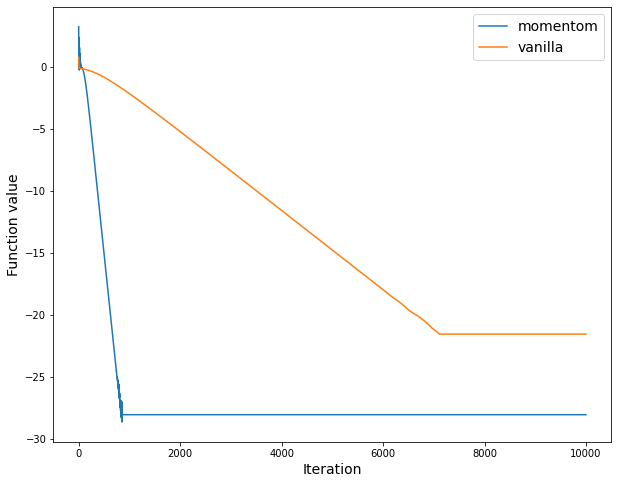

In [ ]:
vanilla_sgd_min_x, vanilla_sgd_function_values = vanilla_sgd_optimization(rosen_brock_function, ROSEN_BROCK_INPUT_DIM, NUM_ITERATIONS, STEP_SIZE)

momentum_sgd_min_x, momentom_sgd_function_values = momentum_sgd_optimization(rosen_brock_function, ROSEN_BROCK_INPUT_DIM, NUM_ITERATIONS, STEP_SIZE)

print('min of rosenbrock function with vanilla sgd is {}'.format(rosen_brock_function(vanilla_sgd_min_x)))
print('min of rosenbrock function with momentum sgd is {}'.format(rosen_brock_function(momentum_sgd_min_x)))
plot_function_value(vanilla_sgd_function_values, momentom_sgd_function_values)

### Powel Function

min of powel function with vanilla sgd is 0.00029297018772922456
min of powel function with momentum sgd is 2.5965937311411835e-06


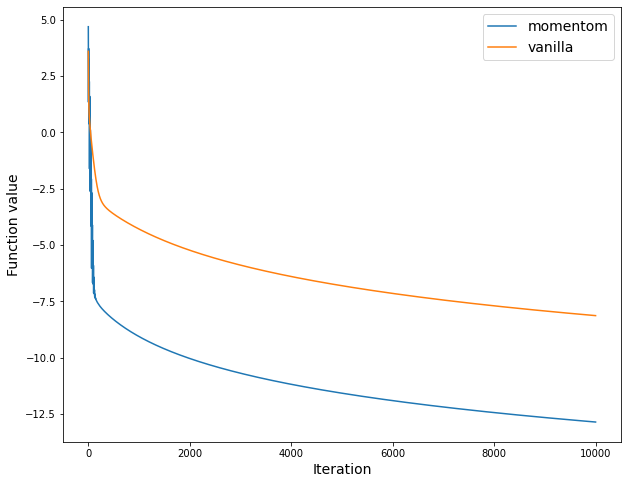

In [ ]:
vanilla_sgd_min_x, vanilla_sgd_function_values = vanilla_sgd_optimization(powel_function, POWEL_INPUT_DIM, NUM_ITERATIONS, STEP_SIZE)

momentum_sgd_min_x, momentom_sgd_function_values = momentum_sgd_optimization(powel_function, POWEL_INPUT_DIM, NUM_ITERATIONS, STEP_SIZE)

print('min of powel function with vanilla sgd is {}'.format(powel_function(vanilla_sgd_min_x)))
print('min of powel function with momentum sgd is {}'.format(powel_function(momentum_sgd_min_x)))
plot_function_value(vanilla_sgd_function_values, momentom_sgd_function_values)

### Question
According to the above plots, what is the effect of momentum? 

Answer: It seems that by using momentum term we can acheive faster convergance to the answer and so momentum method has better answer in the same iteration steps.


## Regularization

### Parameters
**Note**: Use this parameters for this section and do not change them.

In [1]:
feature_dim = 2
train_ratio = 0.8
NUM_ITERATIONS = 10000
STEP_SIZE = 1

### Loading dataset
* Load the salary dataset. 
* Consider YearsExperience column as X and add one column of ones to it for bias. 
* Consider Salary column as Y.
* Split X and Y to train and test. 

In [9]:
df = read_csv('Salary_Data.csv')
df.insert(1, "Bias", 1, True) 
display(df)
X_learn = df.loc[:,['YearsExperience','Bias']]
X_learn = X_learn.to_numpy().tolist()
Y_learn = df.loc[:,'Salary']
Y_learn = Y_learn.to_numpy().tolist()

X_train, X_test, Y_train, Y_test = train_test_split(X_learn, Y_learn, test_size = 1 - train_ratio)
X_train = torch.tensor(X_train)
Y_train = torch.tensor(Y_train)
X_test = torch.tensor(X_test)
Y_test = torch.tensor(Y_test)


,YearsExperience,Bias,Salary
0,1.1,1,39343.0
1,1.3,1,46205.0
2,1.5,1,37731.0
3,2.0,1,43525.0
4,2.2,1,39891.0
5,2.9,1,56642.0
6,3.0,1,60150.0
7,3.2,1,54445.0
8,3.2,1,64445.0
9,3.7,1,57189.0


### Objective function

In [6]:
def linear_equation_error(x, y, w, reg_factor=0):
    '''
    This function should calculate the norm 2 of error of the linear equation.
    Input: 
    x: feature vector (n_sample, feature_dim)
    y: label vector (n_sample, 1)
    w: weights (feature_dim, 1)
    reg_factor: regularization factor. Note that for evaluation this parameter should be set to 0. 
    
    Output: 
    loss: (norm2(y - x*w) + reg_factor*norm2(w))/n_sample
    '''
    w = w[:, None]
    n_sample = x.shape[0]
    error = (torch.norm(y - torch.matmul(x, w)) + reg_factor*torch.norm(w))/n_sample
    return error

In [7]:
naive_linear_equation_error_handler = lambda w: linear_equation_error(X_train, 
                                                                      Y_train, 
                                                                      w,
                                                                      reg_factor)
type(naive_linear_equation_error_handler)

function

### Regularization factor = 0

In [10]:
reg_factor = 0
naive_linear_equation_error_handler = lambda w: linear_equation_error(X_train, 
                                                                      Y_train, 
                                                                      w,
                                                                      reg_factor)

naive_weights, naive_train_error = momentum_sgd_optimization(naive_linear_equation_error_handler, feature_dim, NUM_ITERATIONS, STEP_SIZE)

print('train error without regularization: {}'.format(linear_equation_error(X_train, Y_train, naive_weights, reg_factor)))
print('test error without regularization: {}'.format(linear_equation_error(X_test, Y_test, naive_weights, reg_factor)))

train error without regularization: 35827.56640625
test error without regularization: 16298.77734375


### Regularization factor = 0.001

In [14]:
reg_factor = 0.001
regularized_linear_equation_error_handler = lambda w: linear_equation_error(X_train, 
                                                                            Y_train,
                                                                            w,
                                                                            reg_factor)

regularized_weights, regularized_train_error = momentum_sgd_optimization(
    naive_linear_equation_error_handler, feature_dim, NUM_ITERATIONS, STEP_SIZE)

print('train error with regularization: {}'.format(linear_equation_error(X_train, Y_train, naive_weights, reg_factor)))
print('test error with regularization: {}'.format(linear_equation_error(X_test, Y_test, naive_weights, reg_factor)))

train error with regularization: 35829.03515625
test error with regularization: 16304.6474609375


### Regularization factor = 0.01

In [15]:
reg_factor = 0.01
regularized_linear_equation_error_handler = lambda w: linear_equation_error(X_train, 
                                                                            Y_train, 
                                                                            w,
                                                                            reg_factor)

regularized_weights, regularized_train_error = momentum_sgd_optimization(
    naive_linear_equation_error_handler, feature_dim, NUM_ITERATIONS, STEP_SIZE)

print('train error with regularization: {}'.format(linear_equation_error(X_train, Y_train, naive_weights, reg_factor)))
print('test error with regularization: {}'.format(linear_equation_error(X_test, Y_test, naive_weights, reg_factor)))

train error with regularization: 35842.2421875
test error with regularization: 16357.4794921875


### Question 
* What is the effect of regularization?
* What is the effect of size of regularization term?

Answer: 

Regularization is a factor that we consider to reduce the variance of the model and this technique discourages learning a more complex or flexible model, so as to avoid the risk of overfitting. So as you can see in the error difinition we have a term for w size.

For small coeffient regularization term as the results show we do not face significant error problem but if we increase the term too much, then our model may lose some important features at a point and we get big error terms.